In [2]:
!pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import re
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [4]:
import pandas as pd

data = pd.read_csv(r'C:\Users\rahul\Downloads\archive 8\training.1600000.processed.noemoticon.csv',
                   encoding='ISO-8859-1')


In [5]:
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [7]:
data.tail()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599998,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

In [9]:
data.shape

(1599999, 6)

In [10]:
data.describe()

,0,1467810369
count,1.599999e+06,1.599999e+06
mean,2.000001e+00,1.998818e+09
std,2.000001e+00,1.935757e+08
min,0.000000e+00,1.467811e+09
25%,0.000000e+00,1.956916e+09
50%,4.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [11]:
def pattern_remove(in_text_,in_pattern):
  a = re.findall(in_pattern,in_text)
  for characters in a:
    in_text = re.sub(characters,"",in_text)
  return in_text

In [12]:
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [13]:
data.tail()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599998,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [15]:
import numpy as np
import pandas as pd
import re

# Sentiment140 columns
columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
data = pd.read_csv(r'C:\Users\rahul\Downloads\archive 8\training.1600000.processed.noemoticon.csv',
                   encoding='ISO-8859-1',
                   names=columns)

# Cleaning function
def pattern_remove(text, pattern):
    return re.sub(pattern, '', text)

# Apply regex on the 'text' column (not 'tweet')
data['new_tweet'] = np.vectorize(pattern_remove)(data['text'], r"@[\w]*")


In [16]:
data.head()

,target,ids,date,flag,user,text,new_tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","http://twitpic.com/2y1zl - Awww, that's a bum..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am..."


In [17]:
data['clean_tweet'] = data['text'].str.lower().str.replace(r"@[\w]*"," ",regex=True).str.replace(r"http\S+|www.\S+"," ",regex=True).str.replace(r"[^a-zA-Z#]"," ",regex=True)


In [18]:
data.head()

,target,ids,date,flag,user,text,new_tweet,clean_tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","http://twitpic.com/2y1zl - Awww, that's a bum...",awww that s a bummer you shoulda got ...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...,is upset that he can t update his facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...,i dived many times for the ball managed to ...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am...",no it s not behaving at all i m mad why a...


In [19]:
import pandas as pd

# Sentiment140 columns
columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
data = pd.read_csv(r'C:\Users\rahul\Downloads\archive 8\training.1600000.processed.noemoticon.csv',
                   encoding='ISO-8859-1',
                   names=columns)

# ek hi line me cleaning → output new_tweet me
data['new_tweet'] = data['text'].str.lower() \
    .str.replace(r"@[\w]*"," ",regex=True) \
    .str.replace(r"http\S+|www.\S+"," ",regex=True) \
    .str.replace(r"[^a-zA-Z#]"," ",regex=True)

# sirf text + new_tweet dikhana
print(data[['text','new_tweet']].head())


                                                text  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1  is upset that he can't update his Facebook by ...   
2  @Kenichan I dived many times for the ball. Man...   
3    my whole body feels itchy and like its on fire    
4  @nationwideclass no, it's not behaving at all....   

                                           new_tweet  
0        awww  that s a bummer   you shoulda got ...  
1  is upset that he can t update his facebook by ...  
2    i dived many times for the ball  managed to ...  
3    my whole body feels itchy and like its on fire   
4    no  it s not behaving at all  i m mad  why a...  


In [20]:
data.head()

,target,ids,date,flag,user,text,new_tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww that s a bummer you shoulda got ...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can t update his facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to ...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no it s not behaving at all i m mad why a...


In [21]:
data['new_tweet'] = data['new_tweet'].apply(lambda b : " ".join([ c for c in b.split() if len(c)>3]))

In [22]:
data.head()

,target,ids,date,flag,user,text,new_tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww that bummer shoulda david carr third
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset that update facebook texting might resul...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",behaving here because over there


In [23]:
used_words = data['new_tweet'].apply(lambda b : b.split())
used_words.head()

0    [awww, that, bummer, shoulda, david, carr, third]
1    [upset, that, update, facebook, texting, might...
2    [dived, many, times, ball, managed, save, rest...
3              [whole, body, feels, itchy, like, fire]
4               [behaving, here, because, over, there]
Name: new_tweet, dtype: object

In [24]:
for i in range(len(used_words)):
  used_words[i] = " ".join(used_words[i])

data['new_tweet'] = used_words


In [25]:
data.head()

,target,ids,date,flag,user,text,new_tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww that bummer shoulda david carr third
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset that update facebook texting might resul...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",behaving here because over there


In [26]:
freq_words = " ".join([words for words in data['new_tweet']])

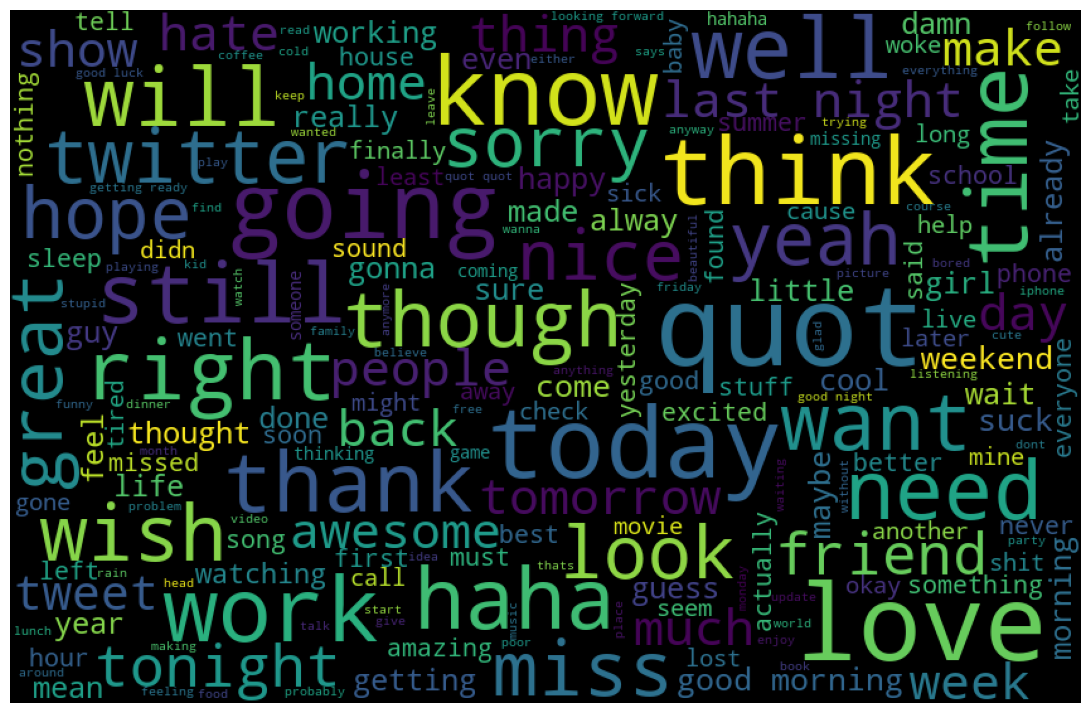

In [27]:
cloud_word = WordCloud(width=850, height=550, random_state=50,
                       max_font_size=90).generate(freq_words)

plt.figure(figsize=(16,9))
plt.imshow(cloud_word)
plt.axis('off')
plt.show()


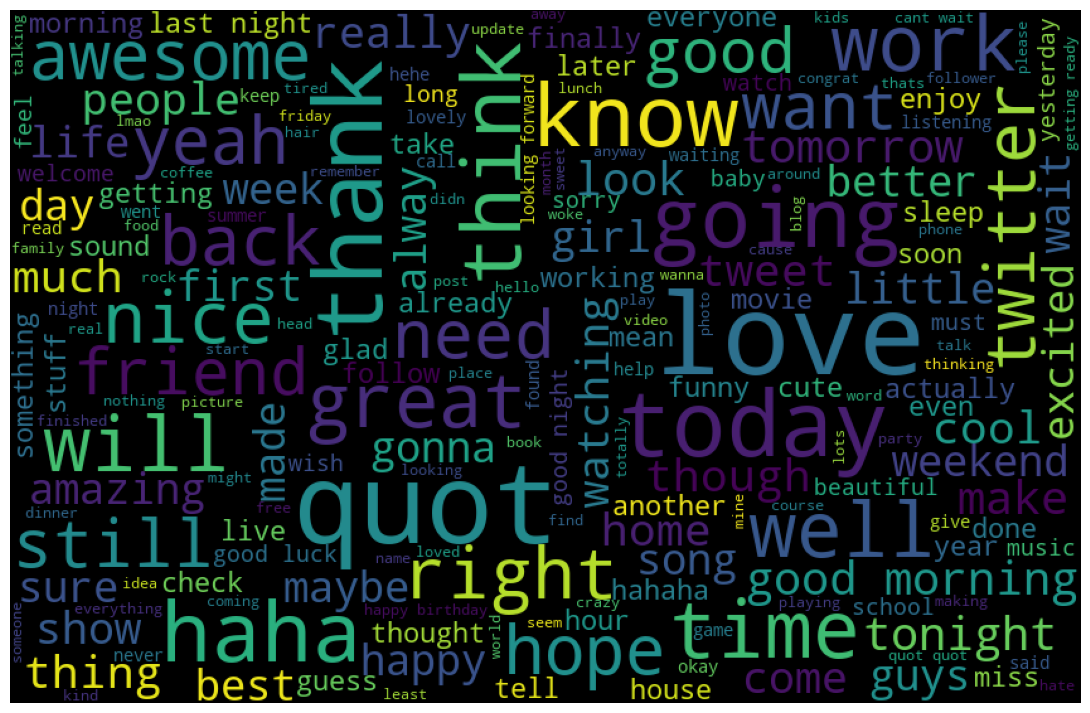

In [28]:
freq_words = " ".join([words for words in data['new_tweet'][data['target']==4]])


cloud_word = WordCloud(width=850, height=550, random_state=50,
                       max_font_size=90).generate(freq_words)

plt.figure(figsize=(16,9))
plt.imshow(cloud_word)
plt.axis('off')
plt.show()



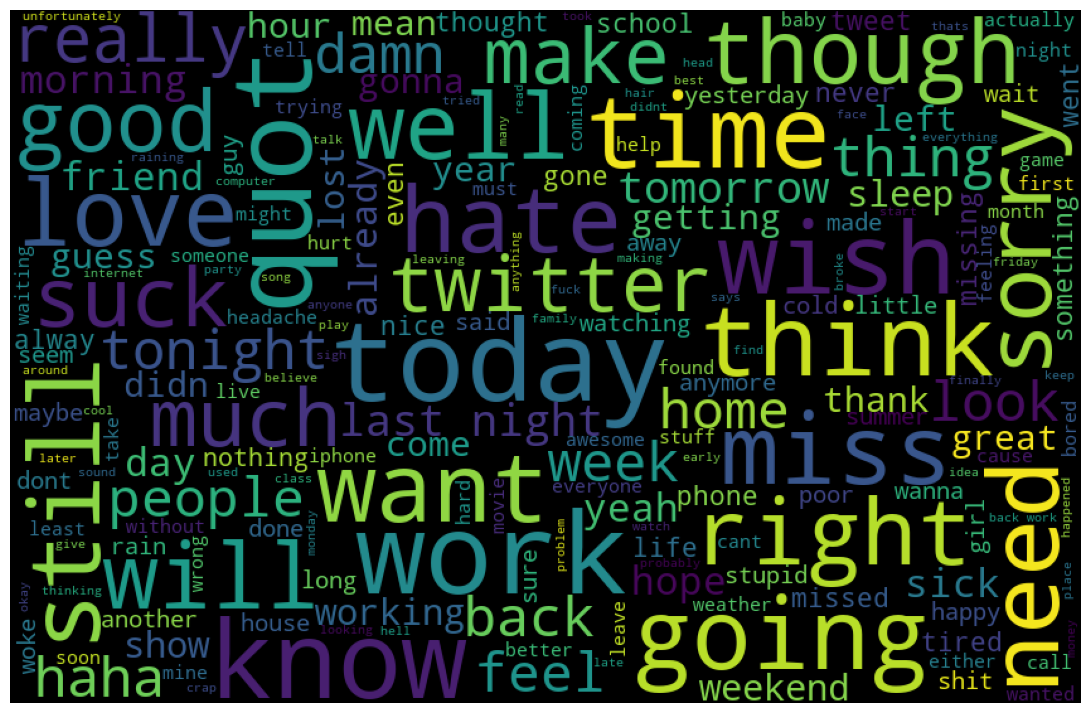

In [29]:
from wordcloud import WordCloud # pyright: ignore[reportMissingImports]
import matplotlib.pyplot as plt

# Positive tweets ke liye wordcloud
freq_words = " ".join([words for words in data['new_tweet'][data['target'] == 0]])

cloud_word = WordCloud(width=850, height=550, random_state=50,
                       max_font_size=90).generate(freq_words)

plt.figure(figsize=(16,9))
plt.imshow(cloud_word)
plt.axis('off')
plt.show()


In [30]:
def get_hashtag(tweets):
  hash_tag = []
  for tweet in tweets:
    d = re.findall(r"#(\w+)",tweet)
    hash_tag.append(d)
  return hash_tag



In [31]:
hashtag_negative = get_hashtag(data['text'][data['target']==0])
hashtag_positive = get_hashtag(data['text'][data['target']==4])

In [32]:
hashtag_negative[:10]
hashtag_positive[:10]

[[], [], [], [], [], [], [], [], [], []]

In [33]:
print(data.columns)


Index(['target', 'ids', 'date', 'flag', 'user', 'text', 'new_tweet'], dtype='object')


In [34]:
tweet_count_pos = nltk.FreqDist([h for sub in hashtag_positive for h in sub])
df_pos = pd.DataFrame({'name_hashtag': list(tweet_count_pos.keys()), 'total_count': list(tweet_count_pos.values())})


In [35]:
df_pos.head()

,name_hashtag,total_count
0,Devunity,1
1,Alexa,1
2,Japan,3
3,Skype,2
4,expletives,1


In [36]:
df_pos = df_pos.nlargest(columns='total_count', n=10)
fig = px.bar(df_pos, x='name_hashtag', y='total_count', color='name_hashtag')
fig.show()


In [37]:
tweet_count_neg = nltk.FreqDist([h for sub in hashtag_negative for h in sub])
df_neg = pd.DataFrame({'name_hashtag': list(tweet_count_neg.keys()), 'total_count': list(tweet_count_neg.values())})


In [38]:
df_neg.head()

,name_hashtag,total_count
0,itm,2
1,therapyfail,1
2,fb,1037
3,TTSC,1
4,24,11


In [39]:
df_neg = df_neg.nlargest(columns='total_count', n=10)
fig = px.bar(df_neg, x='name_hashtag', y='total_count', color='name_hashtag')
fig.show()


In [44]:
import pandas as pd

# Example for Sentiment140 CSV (adjust path as needed)
df = pd.read_csv(r'C:\Users\rahul\Downloads\archive 8\training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)

# Sentiment140 columns (by default):
# 0 = target (0 = negative, 2 = neutral, 4 = positive)
# 5 = tweet text
df = df[[0, 5]]
df.columns = ["sentiment", "text"]

# Map sentiment values
df['sentiment'] = df['sentiment'].map({0: "negative", 2: "neutral", 4: "positive"})

print(df.head())


  sentiment                                               text
0  negative  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1  negative  is upset that he can't update his Facebook by ...
2  negative  @Kenichan I dived many times for the ball. Man...
3  negative    my whole body feels itchy and like its on fire 
4  negative  @nationwideclass no, it's not behaving at all....


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# 1. TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf_vectorizer.fit_transform(df['text'])
y = df['sentiment']

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Train Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Evaluate
print("Logistic Regression Accuracy:", log_reg.score(X_test, y_test))
print("Naive Bayes Accuracy:", nb.score(X_test, y_test))


Logistic Regression Accuracy: 0.767978125
Naive Bayes Accuracy: 0.753340625


In [47]:
import joblib

best_model = log_reg   # or nb if Naive Bayes is better

joblib.dump(best_model, "sentiment_model.pkl")
joblib.dump(tfidf_vectorizer, "tfidf.pkl")

print("✅ Model and vectorizer saved successfully!")


✅ Model and vectorizer saved successfully!


In [48]:
# Load again
model = joblib.load("sentiment_model.pkl")
vectorizer = joblib.load("tfidf.pkl")

sample = ["I love this product, it’s amazing!"]
vec = vectorizer.transform(sample)
print("Prediction:", model.predict(vec))


Prediction: ['positive']
